In [9]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [10]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 143s 32us/step


In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
len(train_labels)

60000

In [14]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
len(test_labels)

10000

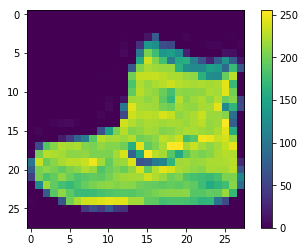

In [18]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [19]:
train_images = train_images/255
test_images = test_images/255

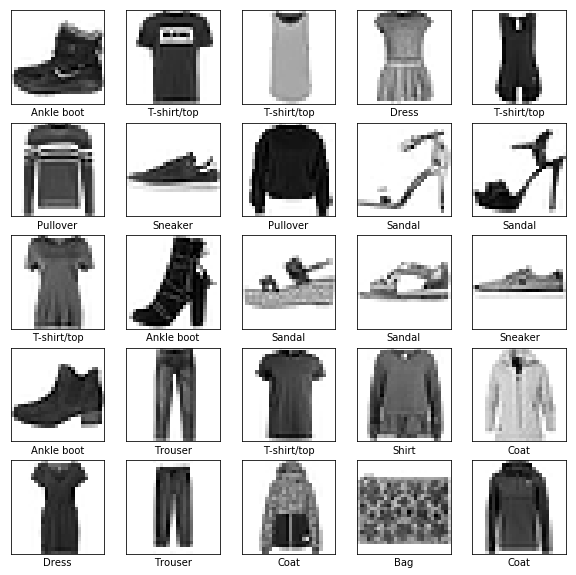

In [24]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 199s 3ms/step - loss: 0.5006 - acc: 0.8246
Epoch 2/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.3756 - acc: 0.8645
Epoch 3/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.3404 - acc: 0.8757
Epoch 4/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.3148 - acc: 0.8840
Epoch 5/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.2953 - acc: 0.8917
Epoch 6/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.2800 - acc: 0.8959
Epoch 7/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.2687 - acc: 0.8998
Epoch 8/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.2580 - acc: 0.9042
Epoch 9/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.2470 - acc: 0.9090
Epoch 10/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.2384 - acc

In [35]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
print (test_acc)

10000/10000 [==============================] - 5s 488us/step
0.8829


In [37]:
predictions = model.predict(test_images)
print (predictions[0])
print (np.argmax(predictions[0]))

[1.1759748e-08 7.7663618e-09 5.7273528e-09 5.9500582e-08 1.7464342e-09
 1.6559171e-04 2.4589161e-08 2.1593412e-02 2.3360113e-07 9.7824061e-01]
9


In [38]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

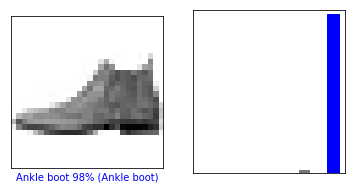

In [39]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

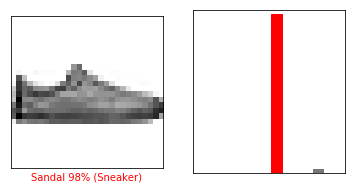

In [40]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

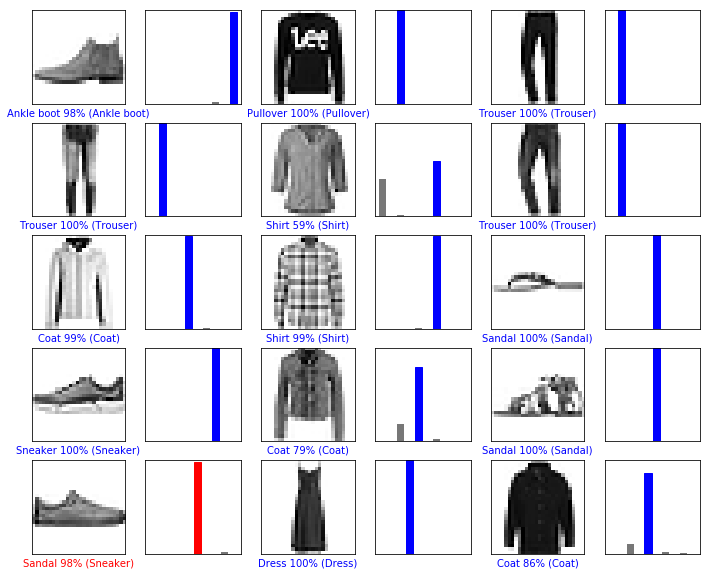

In [41]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

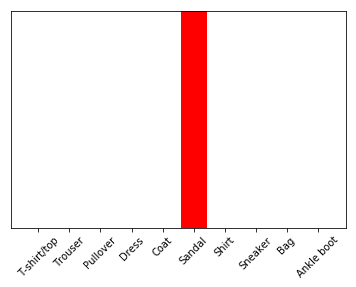

In [51]:
img = test_images[8]
img = (np.expand_dims(img,0))
predictions_single = model.predict(img)


plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [52]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

5
